#### Developing a StateGraph

In [14]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

In [15]:
def start_play(state:State):
    print("Start_Play node has been called")
    return {"graph_info":state['graph_info'] + " I am planning to play"}

def cricket(state:State):
    print("My cricket node has been called")
    return {"graph_info":state['graph_info'] + " Cricket"}

def badminton(state:State):
    print("My badminton node has been called")
    return {"graph_info":state['graph_info'] + " Badminton"}

In [16]:
import random
from typing import Literal

def random_play(state:State)->Literal['cricket','badminton']:
    graph_info = state['graph_info']
    if random.random() > 0.5:
        return "cricket"
    else:
        return "badminton"

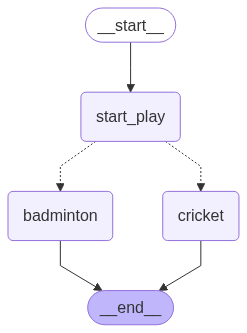

In [18]:
from IPython.display import Image,display
from langgraph.graph import StateGraph, START, END

graph=StateGraph(State)

graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

graph_builder=graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [19]:
graph_builder.invoke({"graph_info":"I am Soham"})

Start_Play node has been called
My badminton node has been called


{'graph_info': 'I am Soham I am planning to play Badminton'}

#### Reducers in a simple chatbot

In [20]:
# Use of reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [21]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [22]:
import os
from dotenv import load_dotenv
load_dotenv()
groq_api_key = os.getenv("GROQ_API_KEY")

In [23]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen-qwq-32b", groq_api_key=groq_api_key)

In [10]:
llm.invoke("Hello!")

AIMessage(content='\n<think>\nOkay, the user said "Hello!". I should respond in a friendly way. Let me think of a greeting that\'s warm and open. Maybe "Hi there!" to keep it casual. I should also ask how I can assist them today. That invites them to state their needs. Let me check if that\'s appropriate. Yep, that should work. Keep it simple and welcoming.\n</think>\n\nHi there! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 12, 'total_tokens': 104, 'completion_time': 0.213044433, 'prompt_time': 0.002969489, 'queue_time': 0.05990818800000001, 'total_time': 0.216013922}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_6b36369676', 'finish_reason': 'stop', 'logprobs': None}, id='run--9f461bc1-1e3f-498e-b291-912db527e85d-0', usage_metadata={'input_tokens': 12, 'output_tokens': 92, 'total_tokens': 104})

In [24]:
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

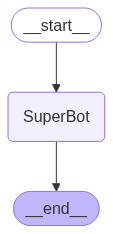

In [25]:
graph = StateGraph(State)
graph.add_node("SuperBot", superbot)
graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)
graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [26]:
graph_builder.invoke({"messages":"My name is Soham"})

{'messages': [HumanMessage(content='My name is Soham', additional_kwargs={}, response_metadata={}, id='28da073b-5f5c-4637-8b4f-bacce4d7b205'),
  AIMessage(content="\n<think>\nOkay, the user's name is Soham. I should greet them and maybe ask how I can assist. Keep it friendly and open-ended. Let me make sure to use their name to personalize the response.\n</think>\n\nHello, Soham! How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific. 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 78, 'prompt_tokens': 15, 'total_tokens': 93, 'completion_time': 0.178608236, 'prompt_time': 0.002771153, 'queue_time': 0.129856327, 'total_time': 0.181379389}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_6b36369676', 'finish_reason': 'stop', 'logprobs': None}, id='run--56dcd471-3b85-4e82-86c9-37b42ca37ab2-0', usage_metadata={'input_tokens': 15, 'output_tokens': 78, 'total_tokens': 93})]}

#### State Schema With DataClasses

In [27]:
from typing import Literal

class TypedDictState(TypedDict):
    name:str
    game:Literal["cricket","badminton"]

In [28]:
def play_game(state:TypedDictState):
    print("---Play Game Node has been called---")
    return {"name":state['name'] + " want to play "}

def cricket(state:TypedDictState):
    print("---Cricket node has been called---")
    return {"name":state["name"] + " cricket", "game":"cricket"}

def badminton(state:TypedDictState):
    print("---Badminton node has been called---")
    return {"name":state["name"] + " badminton", "game":"badminton"}

In [29]:
import random
def decide_play(state:TypedDictState)->Literal["cricket","badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

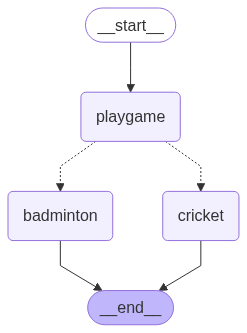

In [30]:
builder=StateGraph(TypedDictState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

## Flow of the graph

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
graph.invoke({"name":"Soham"})

---Play Game Node has been called---
---Cricket node has been called---


{'name': 'Soham want to play  cricket', 'game': 'cricket'}

In [33]:
# Dataclasses

from dataclasses import dataclass
@dataclass
class DataClassState:
    name:str
    game:Literal["badminton","cricket"]

In [34]:
def play_game(state:DataClassState):
    print("---Play Game node has been called--")
    return {"name":state.name + " want to play "}

def cricket(state:DataClassState):
    print("-- Cricket node has been called--")
    return {"name":state.name + " cricket","game":"cricket"}

def badminton(state:DataClassState):
    print("-- badminton node has been called--")
    return {"name":state.name + " badminton","game":"badminton"}

In [35]:
import random
def decide_play(state:DataClassState)->Literal["cricket","badminton"]:
    if random.random()< 0.5 : 
        return "cricket"
    else:
        return "badminton"

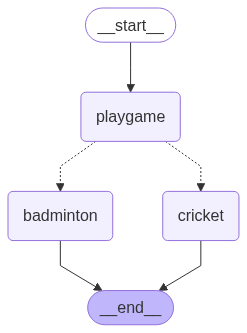

In [36]:
builder=StateGraph(DataClassState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

## Flow of the graph

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [37]:
graph.invoke(DataClassState(name="Soham", game="badminton"))

---Play Game node has been called--
-- badminton node has been called--


{'name': 'Soham want to play  badminton', 'game': 'badminton'}

#### Use of Pydantic for Data Validation

In [38]:
from pydantic import BaseModel

class State(BaseModel):
    name:str

In [39]:
# node function
def example_node(State:State):
    return {"name":"Hello"}

In [40]:
# stategraph
builder = StateGraph(State)
builder.add_node("example_node",example_node)
builder.add_edge(START,"example_node")
builder.add_edge("example_node",END)
graph = builder.compile()

In [41]:
graph.invoke({"name":"Soham"})

{'name': 'Hello'}

In [42]:
graph.invoke({"name":123})

ValidationError: 1 validation error for State
name
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type